## Importing Libraries

In [ ]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Assigning Path for Dataset

In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/Train"
TEST_DIR = "/content/drive/MyDrive/Test"
BATCH_SIZE=64

### Will see how many categories and images present

In [ ]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.png'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 408 in folder angry
For training data, found 595 in folder happy
For training data, found 399 in folder neutral
For training data, found 408 in folder sad


In [ ]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.png'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 105 in folder happy
For testing data, found 102 in folder neutral
For testing data, found 82 in folder sad
For testing data, found 80 in folder angry


### Will see some random images with their emotion classes

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [ ]:
class_names = ['angry','happy','neutral','sad']

Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)


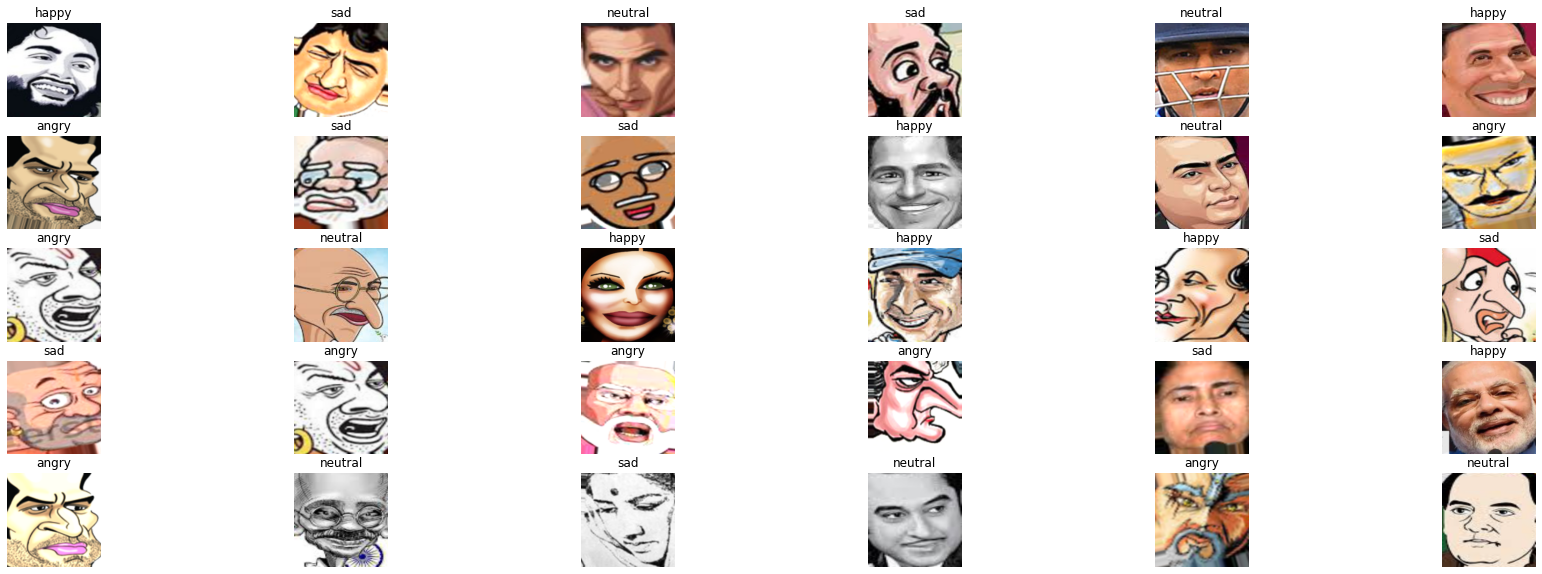

In [ ]:
plt.figure(figsize=(30,10))
for i in range(30):
    plt.subplot(5, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/drive/MyDrive/Train/", target_class=class_name)

### Preparing data for training

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1810 images belonging to 4 classes.
Found 369 images belonging to 4 classes.


### Basic model building (CNN Classifier)

In [ ]:

classifier = Sequential()


classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))


classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Flatten())


classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 4, activation = 'softmax'))


classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

In [ ]:
history = classifier.fit(training_set,
                        epochs = 100,
                        validation_data = test_set)
classifier.save('model1.h5')  # creates a HDF5 file 'model1.h5'

Epoch 1/100
57/57 [==============================] - 16s 254ms/step - loss: 1.3833 - accuracy: 0.3260 - val_loss: 1.3852 - val_accuracy: 0.2873
Epoch 2/100
57/57 [==============================] - 15s 256ms/step - loss: 1.2615 - accuracy: 0.4337 - val_loss: 1.3282 - val_accuracy: 0.3821
Epoch 3/100
57/57 [==============================] - 15s 258ms/step - loss: 1.1765 - accuracy: 0.4867 - val_loss: 1.3422 - val_accuracy: 0.4119
Epoch 4/100
57/57 [==============================] - 14s 247ms/step - loss: 1.1268 - accuracy: 0.5088 - val_loss: 1.2661 - val_accuracy: 0.4363
Epoch 5/100
57/57 [==============================] - 14s 250ms/step - loss: 1.0070 - accuracy: 0.5635 - val_loss: 1.2988 - val_accuracy: 0.4472
Epoch 6/100
57/57 [==============================] - 14s 247ms/step - loss: 0.9135 - accuracy: 0.6381 - val_loss: 1.2905 - val_accuracy: 0.4472
Epoch 7/100
57/57 [==============================] - 15s 263ms/step - loss: 0.8365 - accuracy: 0.6674 - val_loss: 1.2485 - val_accuracy:

### Evaluating the model

In [ ]:
y_pred = classifier.predict(test_set)
print(y_pred)

12/12 [==============================] - 3s 256ms/step
[[1.00000000e+00 1.70273324e-14 1.65496139e-09 2.47962404e-13]
 [4.80606088e-09 2.27876812e-01 6.63559127e-04 7.71459579e-01]
 [1.33176934e-06 9.47326481e-01 5.26716784e-02 4.62280781e-07]
 ...
 [4.31146987e-07 9.99974012e-01 2.27225610e-05 2.73839896e-06]
 [2.52232949e-05 9.95094180e-01 4.87883855e-03 1.70999010e-06]
 [1.40700980e-08 9.97468472e-01 2.53148796e-03 1.07317945e-07]]


In [ ]:
y_res = classifier.evaluate(test_set)

12/12 [==============================] - 2s 185ms/step - loss: 2.6509 - accuracy: 0.6585


Text(0, 0.5, 'Accuracy')

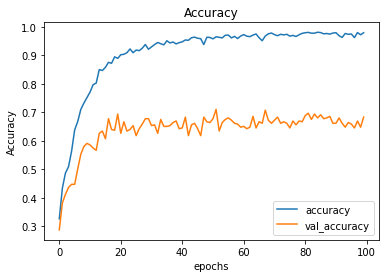

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

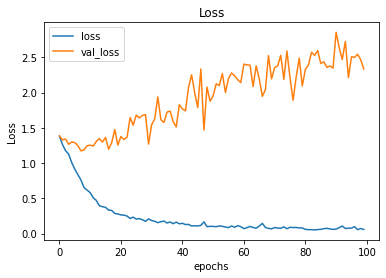

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Prediction with new images

In [ ]:
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)


image = cv2.imread("/content/drive/MyDrive/Test/sad/Lata_Mangeshkar146.png")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
print("Predicted Emotion{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}:->",result)

1/1 [==============================] - 0s 69ms/step
Predicted Emotion{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}:-> 3


In [ ]:
training_set.class_indices


{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}